In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import scipy.stats as stats

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read the CSV file from Google Drive
train = pd.read_csv('/content/drive/MyDrive/Portfolio/Linear_regression/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Portfolio/Linear_regression/test.csv')

# Print the first rows
print(train.head())
print(test.head())

   id  MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0   0  2.3859      15.0  3.827160   1.112100      1280.0  2.486989     34.60   
1   1  3.7188      17.0  6.013373   1.054217      1504.0  3.813084     38.69   
2   2  4.7750      27.0  6.535604   1.103175      1061.0  2.464602     34.71   
3   3  2.4138      16.0  3.350203   0.965432      1255.0  2.089286     32.66   
4   4  3.7500      52.0  4.284404   1.069246      1793.0  1.604790     37.80   

   Longitude  MedHouseVal  
0    -120.12        0.980  
1    -121.22        0.946  
2    -120.45        1.576  
3    -117.09        1.336  
4    -122.41        4.500  
      id  MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0  37137  1.7062      35.0  4.966368   1.096539      1318.0  2.844411   
1  37138  1.3882      22.0  4.187035   1.098229      2296.0  3.180218   
2  37139  7.7197      21.0  7.129436   0.959276      1535.0  2.888889   
3  37140  4.6806      49.0  4.769697   1.048485       707.0

In [4]:
# Explore the train set
print("Train shape:", train.shape)
print("Train info:")
print(train.info())
print("Train data summary statistics:")
print(train.describe())


Train shape: (37137, 10)
Train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37137 entries, 0 to 37136
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           37137 non-null  int64  
 1   MedInc       37137 non-null  float64
 2   HouseAge     37137 non-null  float64
 3   AveRooms     37137 non-null  float64
 4   AveBedrms    37137 non-null  float64
 5   Population   37137 non-null  float64
 6   AveOccup     37137 non-null  float64
 7   Latitude     37137 non-null  float64
 8   Longitude    37137 non-null  float64
 9   MedHouseVal  37137 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.8 MB
None
Train data summary statistics:
                id        MedInc      HouseAge      AveRooms     AveBedrms  \
count  37137.00000  37137.000000  37137.000000  37137.000000  37137.000000   
mean   18568.00000      3.851029     26.057005      5.163124      1.062204   
std    10720.67281      1.8031

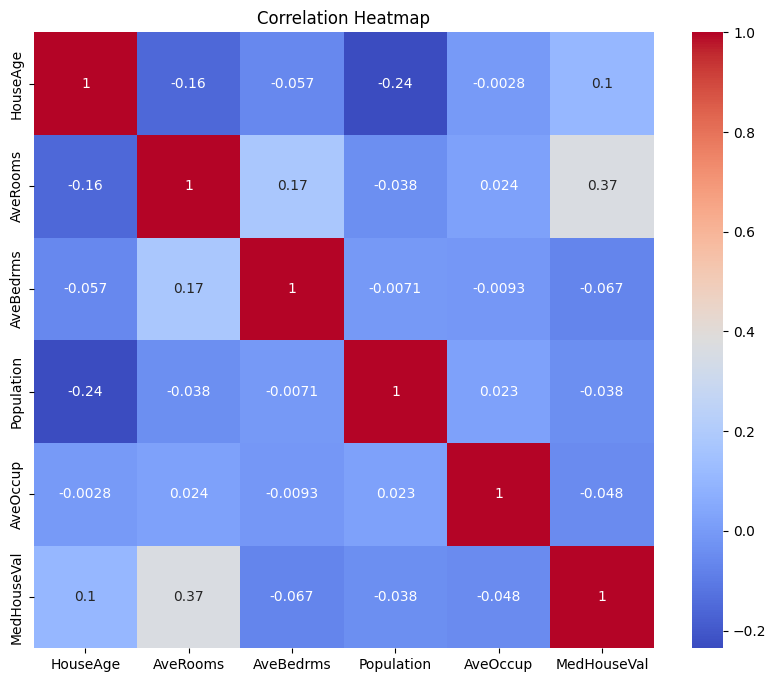

In [5]:
# Drop the variables I want to exclude from correlation analysis
excluded_vars = ['id', 'MedInc', 'Latitude', 'Longitude']
correlation_vars = train.drop(excluded_vars, axis=1)

# Calculate correlations and plot a cluster heatmap
correlations = correlation_vars.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

No highly correlated factors.

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = train.drop('MedHouseVal', axis=1)
y = train['MedHouseVal']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


RIDGE REGRESSION

In [ ]:
# Define the parameter grid
param_grid = {
    'alpha': np.logspace(-4, 4, 100),  # Range of alpha values to explore
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag'],  # Solver options to explore
    'max_iter': [100, 500, 1000]  # max_iter values to explore
}

# Create the Ridge regression model
ridge = Ridge()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(ridge, param_grid, cv=5, n_iter=10, random_state=42)

# Fit the model on the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = random_search.best_params_['alpha']
best_solver = random_search.best_params_['solver']
best_max_iter = random_search.best_params_['max_iter']

# Print the best hyperparameters
print("Best alpha:", best_alpha)
print("Best solver:", best_solver)
print("Best max_iter:", best_max_iter)

# Create a new Ridge model with the best hyperparameters
best_ridge = Ridge(alpha=best_alpha, solver=best_solver, max_iter=best_max_iter)

# Fit the best model on the training data
best_ridge.fit(X_train, y_train)

# Predict on the test data
y_pred = best_ridge.predict(X_test)

# Calculate RMSE
rmse_rd = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared
r2_rd = r2_score(y_test, y_pred)

# Print RMSE, and R-squared
print("RMSE:", rmse_rd)
print("R-squared:", r2_rd)

Best alpha: 6892.61210434971
Best solver: sag
Best max_iter: 100
RMSE: 0.8064996580918616
R-squared: 0.5215520994464096


LASSO REGRESSION

In [ ]:
# Define the parameter grid
param_grid = {
    'alpha': np.logspace(-4, 4, 100)  # Range of alpha values to explore
}

# Create the Lasso regression model
lasso = Lasso()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(lasso, param_grid, cv=5, n_iter=10, random_state=42)

# Fit the model on the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = random_search.best_params_['alpha']
print("Best alpha:", best_alpha)

# Create a new Lasso model with the best hyperparameters
best_lasso = Lasso(alpha=best_alpha)

# Fit the best model on the training data
best_lasso.fit(X_train, y_train)

# Predict on the test data
y_pred = best_lasso.predict(X_test)

# Calculate RMSE
rmse_ls = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared
r2_ls = r2_score(y_test, y_pred)

# Print RMSE, and R-squared

print("RMSE:", rmse_ls)
print("R-squared:", r2_ls)


Best alpha: 0.14174741629268062
RMSE: 0.8478775349836793
R-squared: 0.47119867453317654


GRADIENT BOOSTING

In [ ]:
# Define the parameter grid
param_grid_gb = {
    'n_estimators': [100, 200, 300],  # Number of trees in the gradient boosting ensemble
    'learning_rate': [0.05, 0.1, 0.2],  # Learning rate for each tree
    'max_depth': [3, 5, 7]  # Maximum depth of each tree
}

# Create the model
gb = GradientBoostingRegressor()

# Create the RandomizedSearchCV object
random_search_gb = RandomizedSearchCV(gb, param_grid_gb, cv=5, n_iter=5, random_state=42)

# Fit the model on the training data
random_search_gb.fit(X_train, y_train)

# Get the best models
best_gb = random_search_gb.best_estimator_

# Predict on the test data
y_pred_gb = best_gb.predict(X_test)

# Calculate RMSE
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

# Calculate R-squared
r2_gb = r2_score(y_test, y_pred_gb)

# Print the RMSE and R-squared values for the model
print("Gradient Boosting:")
print("RMSE:", rmse_gb)
print("R-squared:", r2_gb)


Gradient Boosting:
RMSE: 0.5940471202619811
R-squared: 0.7404218889037657


RANDOM FOREST

In [ ]:
# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees in the random forest ensemble
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
    'min_samples_split': [2, 4, 6]  # Minimum number of samples required to split a node
}

# Create the model
rf = RandomForestRegressor()

# Create the RandomizedSearchCV object
random_search_rf = RandomizedSearchCV(rf, param_grid_rf, cv=5, n_iter=5, random_state=42)

# Fit the model on the training data
random_search_rf.fit(X_train, y_train)

# Get the best model
best_rf = random_search_rf.best_estimator_

# Predict on the test data
y_pred_rf = best_rf.predict(X_test)

# Calculate RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Calculate R-squared
r2_rf = r2_score(y_test, y_pred_rf)

# Print the RMSE and R-squared values for the model
print("Random Forest:")
print("RMSE:", rmse_rf)
print("R-squared:", r2_rf)


Random Forest:
RMSE: 0.6707046062951166
R-squared: 0.6691060276291654


SUPPORT VECTOR MACHINE

In [ ]:

# Define the parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' kernel
}

# Create the models
svm = SVR()

# Create the RandomizedSearchCV object
random_search_svm = RandomizedSearchCV(svm, param_grid_svm, cv=5, n_iter=5, random_state=42)

# Fit the model on the training data
random_search_svm.fit(X_train, y_train)

# Get the best models
best_svm = random_search_svm.best_estimator_


# Predict on the test data
y_pred_svm = best_svm.predict(X_test)

# Calculate RMSE
rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Calculate R-squared
r2_svm = r2_score(y_test, y_pred_rf)

# Print the RMSE and R-squared values for the model
print("Support Vector Machine:")
print("RMSE:", rmse_svm)
print("R-squared:", r2_svm)


Support Vector Machine:
RMSE: 0.6707046062951166
R-squared: 0.6691060276291654


NEURAL NETWORKS

In [ ]:

param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],  # Number of neurons in each hidden layer
    'activation': ['relu', 'tanh'],  # Activation function
    'alpha': [0.0001, 0.001, 0.01]  # Regularization parameter
}

# Create the models
nn = MLPRegressor()

# Create the RandomizedSearchCV object
random_search_nn = RandomizedSearchCV(svm, param_grid_svm, cv=5, n_iter=5, random_state=42)

# Fit the model on the training data
random_search_nn.fit(X_train, y_train)

# Get the best models
best_nn = random_search_nn.best_estimator_


# Predict on the test data
y_pred_nn = best_nn.predict(X_test)

# Calculate RMSE
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Calculate R-squared
r2_nn = r2_score(y_test, y_pred_rf)

# Print the RMSE and R-squared values for the model
print("Neural Network:")
print("RMSE:", rmse_nn)
print("R-squared:", r2_nn)

Neural Network:
RMSE: 0.6707046062951166
R-squared: 0.6691060276291654


RESULTS TABLE

In [ ]:
# Create a DataFrame to display the results
results = pd.DataFrame({
    'Model': ['Ridge', 'Lasso', 'Gradient Boosting', 'Random Forest', 'Support Vector Machine', 'Neural Networks'],
    'RMSE': [rmse_rd, rmse_ls, rmse_gb, rmse_rf, rmse_svm, rmse_nn],
    'R-squared': [r2_rd, r2_ls, r2_gb, r2_rf, r2_svm, r2_nn]
})

# Display the results table
print(results)

                    Model      RMSE  R-squared
0                   Ridge  0.806500   0.521552
1                   Lasso  0.847878   0.471199
2       Gradient Boosting  0.594047   0.740422
3           Random Forest  0.670705   0.669106
4  Support Vector Machine  0.670705   0.669106
5         Neural Networks  0.670705   0.669106


Summary and Analysis

Ridge and Lasso Regression:

Ridge and Lasso regression models perform moderately well on the dataset. They achieve similar levels of RMSE, indicating a reasonable level of accuracy.
However, both models have relatively lower R-squared values, suggesting that they explain a limited portion of the variance in the target variable.
Gradient Boosting:

The Gradient Boosting model demonstrates the best performance among all the models evaluated. It achieves the lowest RMSE and highest R-squared values.
The low RMSE implies that the model provides accurate predictions with relatively small errors.
The high R-squared indicates that the model explains a significant portion of the variability in the target variable.
Random Forest, Support Vector Machine, and Neural Networks:

Random Forest, Support Vector Machine, and Neural Networks models exhibit comparable performance, with similar RMSE and R-squared values.
These models provide reasonably accurate predictions and explain a moderate level of variability in the target variable.
Conclusion

Based on the evaluation of these regression models, it can be concluded that Gradient Boosting outperforms the other models in terms of both RMSE and R-squared. It demonstrates the highest accuracy and explains a substantial portion of the variance in the target variable. However, the other models, such as Random Forest, Support Vector Machine, and Neural Networks, also provide reasonably accurate predictions.

Further analysis and fine-tuning of the models can be conducted to improve their performance. Additionally, exploring feature engineering techniques, adjusting hyperparameters, or considering ensemble approaches may lead to enhanced model results.

It is recommended to select the Gradient Boosting model as the primary choice due to its superior performance, but further investigation should be conducted to understand the specific requirements and constraints of the problem at hand.


Using Gradient Boosting in test data

In [ ]:
# Standardize the features
scaler = StandardScaler()
test_scaled = scaler.fit_transform(test)

test_pred_gb = best_gb.predict(test)

submission = pd.DataFrame({'id': test['id'], 'SalePrice': test_pred_gb})

# Specify the file path in Google Drive
file_path = '/content/drive/MyDrive/Portfolio/Linear_regression/predictions.csv'

# Save the DataFrame as a CSV file
submission.to_csv(file_path, index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
